### Подход 1: градиентный бустинг "в лоб"

In [89]:
#1. Считайте таблицу с признаками из файла features.csv с помощью кода, приведенного выше. 
import pandas
features = pandas.read_csv('features.csv', index_col='match_id')
features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [90]:
#Целевая переменная
y = features['radiant_win']
#Удалите признаки, связанные с итогами матча (они помечены в описании данных как 
#отсутствующие в тестовой выборке).
features = features.drop(columns=['duration','radiant_win','tower_status_radiant',
                                  'tower_status_dire','barracks_status_radiant',
                                  'barracks_status_dire'])
features.head(10)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
5,1430284186,1,11,5,1961,1461,19,0,1,6,...,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0
8,1430293701,1,8,3,967,1136,7,1,0,8,...,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0
9,1430299335,7,35,5,2117,1252,16,0,0,6,...,1,26.0,119.0,-61.0,NaN,2,3,4,0,-15.0
11,1430308974,1,17,5,1527,906,10,0,1,7,...,1,9.0,NaN,-84.0,226.0,1,3,4,0,26.0


In [67]:
#2. Проверьте выборку на наличие пропусков с помощью функции count(), 
#которая для каждого столбца показывает число заполненных значений. 
#Устаналиваем параметры вывода полной инфомрации на экран
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
print(features.count())
#Возвращаем параметры вывода к значениям по умолчанию
pandas.reset_option('display.max_rows')
pandas.reset_option('display.max_columns')

start_time                     97230
lobby_type                     97230
r1_hero                        97230
r1_level                       97230
r1_xp                          97230
r1_gold                        97230
r1_lh                          97230
r1_kills                       97230
r1_deaths                      97230
r1_items                       97230
r2_hero                        97230
r2_level                       97230
r2_xp                          97230
r2_gold                        97230
r2_lh                          97230
r2_kills                       97230
r2_deaths                      97230
r2_items                       97230
r3_hero                        97230
r3_level                       97230
r3_xp                          97230
r3_gold                        97230
r3_lh                          97230
r3_kills                       97230
r3_deaths                      97230
r3_items                       97230
r4_hero                        97230
r

In [68]:
#Много ли пропусков в данных? 
print('Пропусков {:0.2f}% от общего количества информации'
      .format(100*(1-(features.count().sum()/(len(features.columns)*len(features))))))
#Запишите названия признаков, имеющих пропуски, и попробуйте 
#для любых двух из них дать обоснование, почему их значения 
#могут быть пропущены.
#Ответ:
#Например данных в колонках first_blood_time и first_blood_team может не быть потому, 
#данное событие (first blood) могло не произойти в первые 5 минут матча

Пропусков 1.95% от общего количества информации


In [91]:
#3. амените пропуски на нули с помощью функции fillna(). На самом деле этот 
#способ является предпочтительным для логистической регрессии, поскольку 
#он позволит пропущенному значению не вносить никакого вклада в предсказание. 
#Для деревьев часто лучшим вариантом оказывается замена пропуска на очень 
#большое или очень маленькое значение — в этом случае при построении разбиения 
#вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева. 
#Также есть и другие подходы — например, замена пропуска на среднее значение 
#признака. Мы не требуем этого в задании, но при желании попробуйте разные 
#подходы к обработке пропусков и сравните их между собой.
features['first_blood_time'].fillna(0, inplace=True)
features['first_blood_team'].fillna(0, inplace=True)
features['first_blood_player1'].fillna(0, inplace=True)
features['first_blood_player2'].fillna(0, inplace=True)
features['radiant_bottle_time'].fillna(0, inplace=True)
features['radiant_courier_time'].fillna(0, inplace=True)
features['radiant_flying_courier_time'].fillna(0, inplace=True)
features['radiant_first_ward_time'].fillna(0, inplace=True)
features['dire_bottle_time'].fillna(0, inplace=True)
features['dire_courier_time'].fillna(0, inplace=True)
features['dire_flying_courier_time'].fillna(0, inplace=True)
features['dire_first_ward_time'].fillna(0, inplace=True)

In [70]:
#Проверим предыдущюю оперцаю по замене пропусков
#Устаналиваем параметры вывода полной инфомрации на экран
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
print(features.count())
#Возвращаем параметры вывода к значениям по умолчанию
pandas.reset_option('display.max_rows')
pandas.reset_option('display.max_columns')

start_time                     97230
lobby_type                     97230
r1_hero                        97230
r1_level                       97230
r1_xp                          97230
r1_gold                        97230
r1_lh                          97230
r1_kills                       97230
r1_deaths                      97230
r1_items                       97230
r2_hero                        97230
r2_level                       97230
r2_xp                          97230
r2_gold                        97230
r2_lh                          97230
r2_kills                       97230
r2_deaths                      97230
r2_items                       97230
r3_hero                        97230
r3_level                       97230
r3_xp                          97230
r3_gold                        97230
r3_lh                          97230
r3_kills                       97230
r3_deaths                      97230
r3_items                       97230
r4_hero                        97230
r

In [71]:
#4. Какой столбец содержит целевую переменную? Запишите его название.
print ('radiant_win')

radiant_win


In [92]:
#5. Забудем, что в выборке есть категориальные признаки, и попробуем обучить 
#градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". 
#Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), 
#не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в 
#таблице отсортированы по времени, и без перемешивания можно столкнуться 
#с нежелательными эффектами при оценивании качества.
from sklearn.model_selection import KFold
X = features.values
kf = KFold(n_splits=5,random_state=214, shuffle=True)

In [78]:
#Оцените качество градиентного бустинга (GradientBoostingClassifier) с 
#помощью данной кросс-валидации, попробуйте при этом разное количество 
#деревьев (как минимум протестируйте следующие значения для количества 
#деревьев: 10, 20, 30). Долго ли настраивались классификаторы? Достигнут 
#ли оптимум на испытанных значениях параметра n_estimators, или же 
#качество, скорее всего, продолжит расти при дальнейшем его увеличении?
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
qualities = []
steps = [10, 20, 30, 50, 100, 200]
for i in steps:
    gbc = GradientBoostingClassifier(n_estimators=i, random_state=241)
    start_time = datetime.datetime.now()
    gbc_quality = cross_val_score(gbc, X, y, cv=kf, scoring='roc_auc')
    print ('Время выполнения: ', datetime.datetime.now() - start_time, '; Качество бустинга: ', gbc_quality, ';')
    qualities.append(np.mean(gbc_quality))

Время выполнения:  0:00:29.624519 ; Качество бустинга:  [0.66408314 0.6624278  0.66881525 0.66643066 0.6682589 ] ;
Время выполнения:  0:00:56.791239 ; Качество бустинга:  [0.68099456 0.67926104 0.68705585 0.6822602  0.6845814 ] ;
Время выполнения:  0:01:23.016459 ; Качество бустинга:  [0.68788141 0.68541859 0.69204713 0.68882536 0.6924522 ] ;
Время выполнения:  0:02:13.737809 ; Качество бустинга:  [0.69660979 0.69362101 0.69990757 0.69686355 0.69975142] ;
Время выполнения:  0:04:24.296628 ; Качество бустинга:  [0.70636246 0.70242016 0.70875105 0.70674329 0.709007  ] ;
Время выполнения:  0:08:52.906476 ; Качество бустинга:  [0.71466411 0.71044981 0.71512769 0.7140687  0.71592953] ;


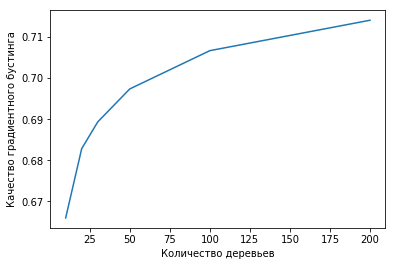

In [79]:
plt.plot(steps, qualities)
plt.xlabel('Количество деревьев')
plt.ylabel('Качество градиентного бустинга')
plt.show()

### Что указать в отчете
1. Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?
    - **Ответ**: first_blood_time и first_blood_team может не быть т.к. данное событие (first blood) могло не произойти в первые 5 минут матча
2. Как называется столбец, содержащий целевую переменную?
    - **Ответ**: radiant_win
3. Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти ниже по тексту. Какое качество при этом получилось? Напомним, что в данном задании мы используем метрику качества AUC-ROC.
    - **Ответ**: Для 30 деревьев время выполнения кросс-валидации для градиентного бустинга равно 0:01:23. Качество при этом составило 0.69
4. Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?
    - **Ответ**: Для данного примера, для достижения более высокого качества модели, имеет смысл использовать более 30 деревьев. Для ускорения обучения можно использовать не всю выборку, а его часть. Так же можно уменьшить глубину деревьев.

### Подход 2: логистическая регрессия

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

C = 1e-05 Время выполнения:  0:00:03.038383 Качество модели:  [0.69386035 0.69226124 0.69661701 0.69630336 0.69658674]
C = 0.0001 Время выполнения:  0:00:05.047965 Качество модели:  [0.71025774 0.70801334 0.71253617 0.71171999 0.71354477]
C = 0.001 Время выполнения:  0:00:09.031159 Качество модели:  [0.71541827 0.71280146 0.71738947 0.71616256 0.71909606]
C = 0.01 Время выполнения:  0:00:12.171754 Качество модели:  [0.71553446 0.71311321 0.71737903 0.71632076 0.71941847]
C = 0.1 Время выполнения:  0:00:12.659874 Качество модели:  [0.71551216 0.71312136 0.71730683 0.71631368 0.71940524]
C = 1.0 Время выполнения:  0:00:12.667997 Качество модели:  [0.7155094  0.71312065 0.71729634 0.71631271 0.71940341]
C = 10.0 Время выполнения:  0:00:12.607084 Качество модели:  [0.71550828 0.71312076 0.71729451 0.71631251 0.71940347]
C = 100.0 Время выполнения:  0:00:12.703357 Качество модели:  [0.71550826 0.71312087 0.71729444 0.71631272 0.71940316]
C = 1000.0 Время выполнения:  0:00:13.046744 Качество

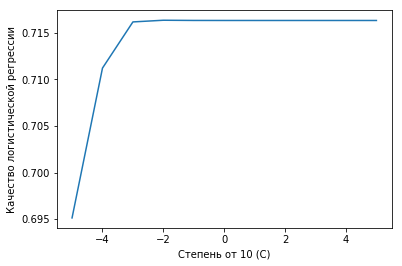

In [94]:
#1. Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) 
#с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. 
#Подберите при этом лучший параметр регуляризации (C). 
from sklearn.linear_model import LogisticRegression

kflr = KFold(n_splits=5, shuffle=True, random_state=214)
qualities_lr = []
steps_c = np.power(10.0, np.arange(-5, 6))
for C in steps_c:
    start_time = datetime.datetime.now()
    lr = LogisticRegression(C=C, random_state=214)
    q_lr = cross_val_score(lr, X, y, cv=kflr, scoring='roc_auc')
    print('C =', C, 'Время выполнения: ', datetime.datetime.now() - start_time, 'Качество модели: ', q_lr)
    qualities_lr.append(np.mean(q_lr))
plt.plot(np.arange(-5, 6), qualities_lr)
plt.xlabel('Степень от 10 (С)')
plt.ylabel('Качество логистической регрессии')
plt.show()

In [95]:
#Какое наилучшее качество у вас получилось? #Как оно соотносится с качеством градиентного бустинга? 
#Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с 
#градиентным бустингом?
max_q = max(qualities_lr)
max_q_index = qualities_lr.index(max_q)
print('Максимальное качество равное ', max_q, 'было достигнуто при С =', steps_c[max_q_index])

Максимальное качество равное  0.7163531846783474 было достигнуто при С = 0.01


Максимальное качество равное  0.7163531846783474 было достигнуто при С = 0.01

Чтоб достигнуть подобного качества в градиентном бустинге необходимо использовать более 200 деревьев. При этом время выполнения линейной регрессии заметно меньше.

C = 1e-05 Время выполнения:  0:00:02.937470 Качество модели:  [0.69377669 0.69229241 0.69653228 0.69642462 0.69647425]
C = 0.0001 Время выполнения:  0:00:04.624955 Качество модели:  [0.71020596 0.70809181 0.71249192 0.7119684  0.71348562]
C = 0.001 Время выполнения:  0:00:08.453039 Качество модели:  [0.71546218 0.71293359 0.71743105 0.71642866 0.71909285]
C = 0.01 Время выполнения:  0:00:11.074327 Качество модели:  [0.71558883 0.71322876 0.71745037 0.71658101 0.71940556]
C = 0.1 Время выполнения:  0:00:12.035629 Качество модели:  [0.71556573 0.71324209 0.71737839 0.71657527 0.71939651]
C = 1.0 Время выполнения:  0:00:11.988620 Качество модели:  [0.71556153 0.7132434  0.71736791 0.71657281 0.7193958 ]
C = 10.0 Время выполнения:  0:00:12.328003 Качество модели:  [0.7155603  0.71324308 0.71736632 0.7165722  0.71939592]
C = 100.0 Время выполнения:  0:00:11.912886 Качество модели:  [0.71556003 0.7132431  0.7173662  0.71657236 0.71939612]
C = 1000.0 Время выполнения:  0:00:11.828008 Качество

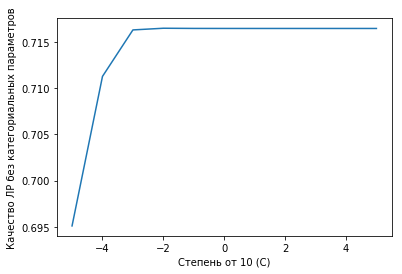

In [96]:
#Среди признаков в выборке есть категориальные, которые мы использовали как числовые, 
#что вряд ли является хорошей идеей. Категориальных признаков в этой задаче 
#одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. 
#Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой 
#выборке с подбором лучшего параметра регуляризации. 
features_cut = features.drop(columns=['lobby_type','r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 
                                      'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero','d4_hero', 'd5_hero'])
X_cut = features_cut.values;
X_cut = sc.fit_transform(X_cut)
qualities_lr_cut = []
steps_c = np.power(10.0, np.arange(-5, 6))
for C in steps_c:
    start_time = datetime.datetime.now()
    lr = LogisticRegression(C=C, random_state=214)
    q_lr = cross_val_score(lr, X_cut, y, cv=kflr, scoring='roc_auc')
    print('C =', C, 'Время выполнения: ', datetime.datetime.now() - start_time, 'Качество модели: ', q_lr)
    qualities_lr_cut.append(np.mean(q_lr))
plt.plot(np.arange(-5, 6), qualities_lr_cut)
plt.xlabel('Степень от 10 (С)')
plt.ylabel('Качество ЛР без категориальных параметров')
plt.show()

In [97]:
#Изменилось ли качество? Чем вы можете это объяснить?
max_q_cut = max(qualities_lr_cut)
max_q_cut_index = qualities_lr_cut.index(max_q_cut)
print('Максимальное качество равное ', max_q_cut, 'было достигнуто при С =', steps_c[max_q_cut_index])

Максимальное качество равное  0.7164509061298161 было достигнуто при С = 0.01


###  Изменилось ли качество? Чем вы можете это объяснить?
Рост качества по сравнению с выборкой без категориальных признаков составил десятитысячные доли при том же параметре С. Столь незначительные изменения с этими признаками говорит о том, что построенная модель парвильно распознала эти признаки как не влияющие на результат

In [110]:
heroes = pandas.read_csv('./data/dictionaries/heroes.csv')
print ('Всего героев:', len(heroes))

Всего героев: 112


In [119]:
#3. На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, 
#какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные 
#характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, 
#сколько различных идентификаторов героев существует в данной игре (вам может пригодиться 
#фукнция unique или value_counts).

F_pick = np.zeros((features.shape[0], len(heroes)))
for i, match_id in enumerate(features.index):
    for p in np.arange(1,5):
        F_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        F_pick[i, features.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

features_h = pandas.DataFrame(F_pick, index=features.index)

In [120]:
X = pandas.concat([features, features_h], axis=1)

C = 1e-05 Время выполнения:  0:00:05.484320 Качество модели:  [0.708893   0.70712846 0.7108294  0.71141673 0.71228993]
C = 0.0001 Время выполнения:  0:00:08.968661 Качество модели:  [0.73451832 0.73150556 0.73530266 0.73571176 0.73880825]
C = 0.001 Время выполнения:  0:00:15.403540 Качество модели:  [0.74286395 0.73906369 0.74286782 0.74230102 0.74678309]
C = 0.01 Время выполнения:  0:00:21.078330 Качество модели:  [0.74321873 0.73938201 0.74316365 0.74235233 0.74704892]
C = 0.1 Время выполнения:  0:00:22.432020 Качество модели:  [0.74317999 0.73936166 0.74313692 0.74231333 0.74701259]
C = 1.0 Время выполнения:  0:00:22.568307 Качество модели:  [0.74317163 0.73936279 0.74313406 0.74230637 0.74700791]
C = 10.0 Время выполнения:  0:00:22.562166 Качество модели:  [0.74317093 0.73936203 0.74313358 0.74230655 0.74700732]
C = 100.0 Время выполнения:  0:00:22.236956 Качество модели:  [0.74317092 0.7393622  0.74313348 0.74230628 0.74700755]
C = 1000.0 Время выполнения:  0:00:21.984157 Качество

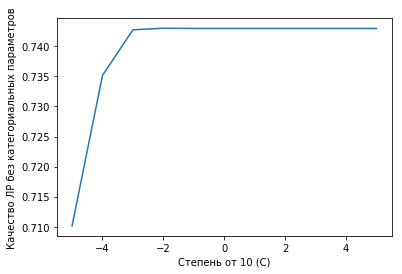

In [112]:
#5. Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего 
#параметра регуляризации. 
sc = StandardScaler()
X = sc.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=214)
qualities_ms = []
steps_c = np.power(10.0, np.arange(-5, 6))
for C in steps_c:
    start_time = datetime.datetime.now()
    lr = LogisticRegression(C=C, random_state=214)
    q_ms = cross_val_score(lr, X, y, cv=kf, scoring='roc_auc')
    print('C =', C, 'Время выполнения: ', datetime.datetime.now() - start_time, 'Качество модели: ', q_ms)
    qualities_ms.append(np.mean(q_ms))
plt.plot(np.arange(-5, 6), qualities_ms)
plt.xlabel('Степень от 10 (С)')
plt.ylabel('Качество ЛР без категориальных параметров')
plt.show()

In [113]:
#Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?
max_q_ms = max(qualities_ms)
max_q_ms_index = qualities_ms.index(max_q_ms)
print('Максимальное качество равное ', max_q_ms, 'было достигнуто при С =', steps_c[max_q_ms_index])

Максимальное качество равное  0.7430331276842828 было достигнуто при С = 0.01


### Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?
Максимальное качество равное  0.7430331276842828 было достигнуто при С = 0.01
Качество данной модели улучшилось с ~0.716 до ~0.743. Скачек в качестве произошел из-за использования осмысленных данных о героях вместо ранее использованых данных, которые модель, возможно, воспринимала как шум

In [114]:
#Постройте предсказания вероятностей победы команды Radiant для тестовой выборки с помощью 
#лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, 
#что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между 
#собой (т.е. что модель не получилась константной).
features_test = pandas.read_csv('features_test.csv', index_col='match_id')
features_test.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
6,1430287923,0,93,4,1103,1089,8,0,1,9,...,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
7,1430293357,1,20,2,556,570,1,0,0,9,...,2,-29.0,168.0,-54.0,NaN,3,2,2,1,16.0
10,1430301774,1,112,2,751,808,1,0,0,13,...,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
13,1430323933,1,27,3,708,903,1,1,1,11,...,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
16,1430331112,1,39,4,1259,661,4,0,0,9,...,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0


In [115]:
#Проверим тестовую выборку на наличие пропусков
#Устаналиваем параметры вывода полной инфомрации на экран
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
print(features_test.count())
#Возвращаем параметры вывода к значениям по умолчанию
pandas.reset_option('display.max_rows')
pandas.reset_option('display.max_columns')

start_time                     17177
lobby_type                     17177
r1_hero                        17177
r1_level                       17177
r1_xp                          17177
r1_gold                        17177
r1_lh                          17177
r1_kills                       17177
r1_deaths                      17177
r1_items                       17177
r2_hero                        17177
r2_level                       17177
r2_xp                          17177
r2_gold                        17177
r2_lh                          17177
r2_kills                       17177
r2_deaths                      17177
r2_items                       17177
r3_hero                        17177
r3_level                       17177
r3_xp                          17177
r3_gold                        17177
r3_lh                          17177
r3_kills                       17177
r3_deaths                      17177
r3_items                       17177
r4_hero                        17177
r

In [116]:
#Заполняем пропущенные значения
features_test['first_blood_time'].fillna(0, inplace=True)
features_test['first_blood_team'].fillna(0, inplace=True)
features_test['first_blood_player1'].fillna(0, inplace=True)
features_test['first_blood_player2'].fillna(0, inplace=True)
features_test['radiant_bottle_time'].fillna(0, inplace=True)
features_test['radiant_courier_time'].fillna(0, inplace=True)
features_test['radiant_flying_courier_time'].fillna(0, inplace=True)
features_test['radiant_first_ward_time'].fillna(0, inplace=True)
features_test['dire_bottle_time'].fillna(0, inplace=True)
features_test['dire_courier_time'].fillna(0, inplace=True)
features_test['dire_flying_courier_time'].fillna(0, inplace=True)
features_test['dire_first_ward_time'].fillna(0, inplace=True)

In [118]:
#Применяем "мешок слов" на тестовую выборку
FT_pick = np.zeros((features_test.shape[0], len(heroes)))
for i, match_id in enumerate(features_test.index):
    for p in np.arange(1,5):
        FT_pick[i, features_test.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        FT_pick[i, features_test.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

features_test_h = pandas.DataFrame(FT_pick, index=features_test.index)
X_test = pandas.concat([features_test, features_test_h], axis=1)

In [136]:
#масштабируем
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
sc = StandardScaler()
X = sc.fit_transform(X)
lr_best = LogisticRegression(C=0.01, random_state=214)
lr_best = lr_best.fit(X, y)

In [139]:
#вычисляем вероятности
y_test = lr_best.predict_proba(X_test)

In [268]:
#сохраняем данные о победах в файл
d = {'radiant_win': np.squeeze(np.asarray(y_test[0:,0:1]))}
result_data = pandas.DataFrame(data=d,index=features_test.index.values,columns=['radiant_win'])

In [269]:
result_data.to_csv('result_predict.csv')

In [275]:
#минимальные и максимальные значения вероятностей для победы команды Radiant
print(min(np.squeeze(np.asarray(y_test[0:,0:1]))))
print(max(np.squeeze(np.asarray(y_test[0:,0:1]))))

0.004838127740765863
0.9915189826512707


### Что указать в отчете

1. Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
    - **Ответ** Максимальное качество равное 0.7163531846783474 было достигнуто при С = 0.01
    Чтоб достигнуть подобного качества в градиентном бустинге необходимо использовать более 200 деревьев. При этом время выполнения линейной регрессии заметно меньше.
2. Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?
    - **Ответ** Рост качества по сравнению с выборкой без категориальных признаков составил десятитысячные доли при том же параметре С. Столь незначительные изменения с этими признаками говорит о том, что построенная модель парвильно распознала эти признаки как не влияющие на результат
3. Сколько различных идентификаторов героев существует в данной игре?
    - Всего 112 героев
4. Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?
    - Максимальное качество равное 0.7430331276842828 было достигнуто при С = 0.01 Качество данной модели улучшилось с ~0.716 до ~0.743. Скачек в качестве произошел из-за использования осмысленных данных о героях вместо ранее использованых данных, которые модель, возможно, воспринимала как шум
5. Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?
    - Минимальное значение для победы команды Radiant = 0.004838127740765863
    - Максимальное значение для победы команды Radiant = 0.9915189826512707